In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
df=pd.read_csv("housing.csv.zip")
df.head()
new_df=df.copy()
new_df.drop(["longitude","latitude","ocean_proximity"],axis=1,inplace=True)
new_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [3]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [16]:
for column in new_df.columns:
    new_df[column]=new_df[column]/new_df[column].abs().max()
new_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.788462,0.022380,0.020016,0.009024,0.020717,0.555010,0.905198
1,0.403846,0.180544,0.171606,0.067289,0.187110,0.553423,0.716999
2,1.000000,0.037309,0.029480,0.013901,0.029102,0.483823,0.704199
3,1.000000,0.032401,0.036462,0.015638,0.036008,0.376204,0.682599
4,1.000000,0.041378,0.043445,0.015834,0.042585,0.256412,0.684399
...,...,...,...,...,...,...,...
20635,0.480769,0.042345,0.058029,0.023681,0.054258,0.104019,0.156200
20636,0.346154,0.017726,0.023274,0.009977,0.018744,0.170452,0.154200
20637,0.326923,0.057325,0.075252,0.028222,0.071194,0.113333,0.184600
20638,0.346154,0.047304,0.063460,0.020767,0.057382,0.124479,0.169400


In [17]:
X=new_df.drop(["median_house_value"], axis=1)
X=X.fillna(0)
Y=new_df["median_house_value"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [18]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[0.66021755 0.4324781  0.50002215 ... 0.44391842 0.42892733 0.15988459]
10467    0.841198
7898     0.587399
9340     0.603999
1839     0.622799
15044    0.632799
           ...   
14544    0.812398
4185     0.371599
7998     0.432399
9715     0.336599
2758     0.169400
Name: median_house_value, Length: 6192, dtype: float64


In [23]:
print(f"MAE error: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE error: {mean_squared_error(y_test,y_pred)}")
print(f"r2 error: {r2_score(y_test,y_pred)}")

MAE error: 0.11320466083592108
MSE error: 0.023654665482418652
r2 error: 0.555059668961895


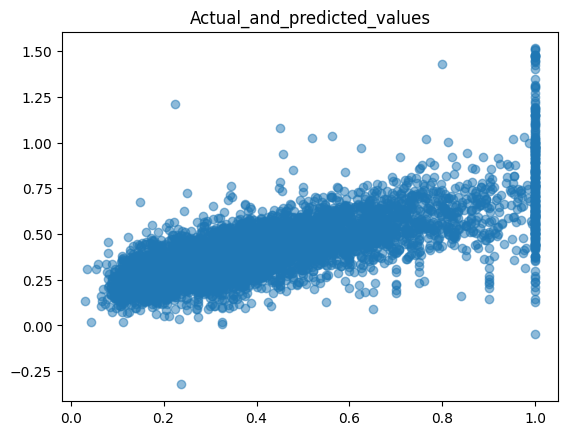

In [24]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.x_label=("Actual_values")
plt.y_label=("Predicted_values")
plt.title("Actual_and_predicted_values")
plt.show()